In [1]:
from mynotebooks import *
%matplotlib inline  
nao = Box2DWorld.NaoRobot(position=(0,0),name='human')

Created Left Lateralized Arm Lims:  [-1.26, -2.73, -2.73] [1.26, 0.0, 0.0]
Created Right Lateralized Arm Lims:  [-1.26, 0.0, 0.0] [1.26, 2.73, 2.73]


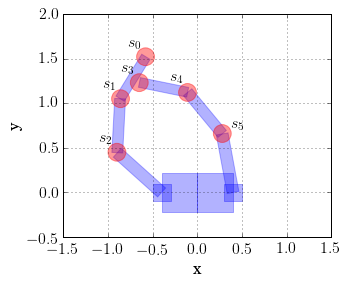

In [29]:
# figure of the paper
fig, ax = Box2DWorld.makeFigure(axes=[-1.5,1.5,-0.5,2])
m = [0.8,-1,-0.5,0.2,0.5,0.7] # absolute motor joint angles in rad:  limits -2..2, 90 degrees
nao.gotoTargetJointsAll(m)    
Box2DWorld.plotAll(ax,centers=nao.getSalient(),label="s",xlabel="x",ylabel="y",mainfont=16)
plt.show()
fig.savefig('imgs/robotsim.png', dpi=300, format='png')

### Sensorimotor mapping : f(m)=s

In [2]:
m_mins = nao.m_mins()
m_maxs = nao.m_maxs()
s_mins = [ -3.0,  -1, -3.0, -1]
s_maxs = [ 3.0, 2, 3.0, 2 ]

env = SensoriMotor.RobotArmEnv(m_mins, m_maxs, s_mins, s_maxs)
fms = SensorimotorModel.from_configuration(env.conf, 'nearest_neighbor')

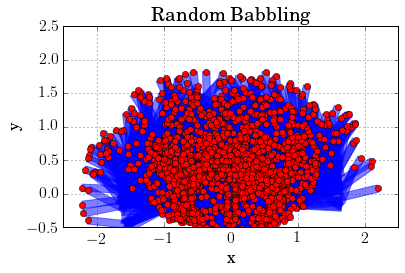

In [3]:
fig, ax = Box2DWorld.makeFigure(axes=[-2.5,2.5,-0.5,2.5])
error,mean_error,mean_var = [],[],[]
for i in range(1000):
    m = env.getRandomInput()
    nao.gotoTargetJointsAll(m)
    s = nao.getFinalPos(arm=0)+nao.getFinalPos(arm=1)
    
    if(fms.size()>2): 
        s_pred = fms.forward_prediction(m)  
        VectorFigUtils.error_monitor(s,s_pred,error,mean_error,mean_var)        
        
    fms.update(m, s) 
    Box2DWorld.plotWorld(ax)
    ax.plot(*s[:2], marker='o', color='red')
    ax.plot(*s[2:], marker='o', color='red')
    
VectorFigUtils.decorate("x","y","Random Babbling",mainfont=16)
plt.grid()
plt.show()
fig.savefig('imgs/RandomBabbling.png', dpi=300, format='png')

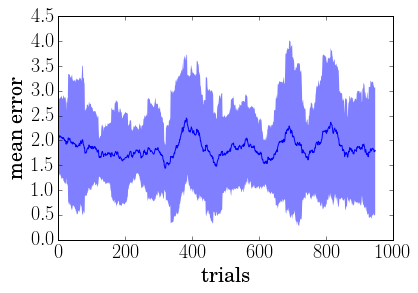

In [4]:
plt.close()
VectorFigUtils.drawPlotXY(range(len(mean_error)),mean_error,mean_var,xlabel="trials",ylabel="mean error")
plt.show()
fig.savefig('imgs/RobotRandomBabblingError.png', dpi=300, format='png')

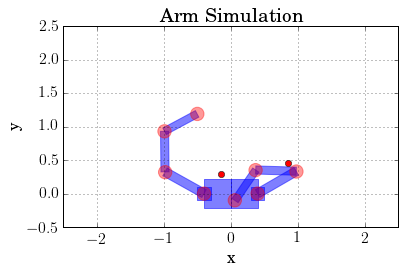

In [21]:
# Test of Forward Prediction
fms.mode = "exploit"
fig, ax = Box2DWorld.makeFigure(axes=[-2.5,2.5,-0.5,2.5])
m = env.getRandomInput()
s_pred = fms.forward_prediction(m)
s = nao.gotoTargetJointsAll(m)
Box2DWorld.plotWorld(ax,centers=nao.getSalient())
ax.plot(*s_pred[:2], marker='o', color='red')
ax.plot(*s_pred[2:], marker='o', color='red')
VectorFigUtils.decorate("x","y","Arm Simulation",mainfont=16)
plt.show()